### <left> High-Dimensional Deep Learning - 5A
## <center>*Mini-project n° 3 – SSL for Anomaly Detection*</center>
### <center>2024-2025</center>
<div style="text-align: right;">
    <b>Project 3/4</b><br>
<div style="text-align: left;">
<b>Noms :</b> Maïmouna Gadji, Phuc-Luan Nguyen, Maddie Perez et Julia Soufflet<br>

### Objectif : 

L'objectif de ce projet est de 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import  random
import shutil
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# Training images
pathb="./MVTec_AD/bottle"
pathh = "./MVTec_AD/hazelnut"
pathc = "./MVTec_AD/capsule"
patht = "./MVTec_AD/toothbrush"
pathw = "./engine_wiring"

In [3]:
# Training images
train_filenames_bottle = os.listdir(pathb + "/train/good")
train_filenames_hazelnut = os.listdir(pathh + "/train/good")
train_filenames_capsule = os.listdir(pathc + "/train/good")
train_filenames_toothbrush = os.listdir(patht + "/train/good")
train_filenames_W = os.listdir(pathw + "/train/good")
#Création des labels
train_categories_B = []
for filename in train_filenames_bottle:
    train_categories_B.append(0)

train_categories_H = []
for filename in train_filenames_hazelnut:
    train_categories_H.append(0)

train_categories_C = []
for filename in train_filenames_capsule:
    train_categories_C.append(0)

train_categories_T = []
for filename in train_filenames_toothbrush:
    train_categories_T.append(0)

#train_categories_W = []
#for filename in train_filenames_W:
#    train_categories_W.append(0)

In [4]:
def reorganize_images_good(source_dirs, target_dir):
    """
    Cette fonction regroupe les images des différents dossiers (good et défauts) et les renomme avec des noms uniques.
    
    :param source_dirs: Liste des chemins vers les dossiers à traiter (good et les dossiers défauts)
    :param target_dir: Dossier où toutes les images seront regroupées et renommées
    """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)  # Crée le dossier cible s'il n'existe pas
    
    count = 1  # Compteur pour nommer les fichiers de manière unique

    # Parcours chaque dossier dans la liste source_dirs
    for source_dir in source_dirs:
        for filename in os.listdir(source_dir):
            file_path = os.path.join(source_dir, filename)
            
            # Vérifie si c'est un fichier image (vous pouvez étendre les types de fichiers si nécessaire)
            if os.path.isfile(file_path) and filename.endswith(('.png')):
                # Nouveau nom basé sur le compteur
                new_name = f"good{str(count).zfill(3)}.png"  # 001.jpg, 002.jpg, etc.
                target_path = os.path.join(target_dir, new_name)
                
                # Copie le fichier vers le dossier cible avec le nouveau nom
                shutil.copy(file_path, target_path)
                
                # Incrémente le compteur pour le prochain fichier
                count += 1

def reorganize_images_default(source_dirs, target_dir):
    """
    Cette fonction regroupe les images des différents dossiers (good et défauts) et les renomme avec des noms uniques.
    
    :param source_dirs: Liste des chemins vers les dossiers à traiter (good et les dossiers défauts)
    :param target_dir: Dossier où toutes les images seront regroupées et renommées
    """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)  # Crée le dossier cible s'il n'existe pas
    
    count = 1  # Compteur pour nommer les fichiers de manière unique

    # Parcours chaque dossier dans la liste source_dirs
    for source_dir in source_dirs:
        for filename in os.listdir(source_dir):
            file_path = os.path.join(source_dir, filename)
            
            # Vérifie si c'est un fichier image (vous pouvez étendre les types de fichiers si nécessaire)
            if os.path.isfile(file_path) and filename.endswith(('.png')):
                # Nouveau nom basé sur le compteur
                new_name = f"default{str(count).zfill(3)}.png"  # 001.jpg, 002.jpg, etc.
                target_path = os.path.join(target_dir, new_name)
                
                # Copie le fichier vers le dossier cible avec le nouveau nom
                shutil.copy(file_path, target_path)
                
                # Incrémente le compteur pour le prochain fichier
                count += 1

In [5]:
# Test bottle
source_dirs_D = [
    pathb+'/test/contamination',
    pathb+'/test/broken_small',
    pathb+'/test/broken_large'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathb+'/test/good',  # Dossier 'good'
 ]

target_dirB = pathb +'/test/test/'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirB)
reorganize_images_default(source_dirs_D, target_dirB)

#Création des labels
test_filenames_B = os.listdir(target_dirB)
test_categories_B = []
for filename in test_filenames_B:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_B.append(1)
    else:
        test_categories_B.append(0)

In [6]:
# Test hazelnut
source_dirs_D = [
    pathh+'/test/crack',
    pathh+'/test/cut',
    pathh+'/test/print',
    pathh+'/test/hole'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathh+'/test/good',  # Dossier 'good'
 ]

target_dirH = pathh +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirH)
reorganize_images_default(source_dirs_D, target_dirH)

#Création des labels
test_filenames_H = os.listdir(target_dirH)
test_categories_H = []
for filename in test_filenames_H:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_H.append(1)
    else:
        test_categories_H.append(0)

In [7]:
# Test capsule
source_dirs_D = [
    pathc+'/test/crack',
    pathc+'/test/faulty_imprint',
    pathc+'/test/poke',
    pathc+'/test/scratch',
    pathc+'/test/squeeze'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    pathc+'/test/good',  # Dossier 'good'
 ]

target_dirC = pathc +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirC)
reorganize_images_default(source_dirs_D, target_dirC)

#Création des labels
test_filenames_C = os.listdir(target_dirC)
test_categories_C = []
for filename in test_filenames_C:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_C.append(1)
    else:
        test_categories_C.append(0)

In [8]:
# Test toothbrush
source_dirs_D = [
    patht+'/test/defective'# Dossier avec des défauts (MVT-AD)
 
]

source_dirs_G = [
    patht+'/test/good',  # Dossier 'good'
 ]

target_dirT = patht +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirT)
reorganize_images_default(source_dirs_D, target_dirT)

#Création des labels
test_filenames_T = os.listdir(target_dirT)
test_categories_T = []
for filename in test_filenames_T:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_T.append(1)
    else:
        test_categories_T.append(0)

# Test engine wiring
source_dirs_D = [
    pathw+'/test/blue_hoop',
    pathw+'/test/cardboard',
    pathw+'/test/fastening',
    pathw+'/test/multiple',
    pathw+'/test/obstruction'# Dossier avec des défauts (Auto_VI)
 
]

source_dirs_G = [
    pathw+'/test/good',  # Dossier 'good'
 ]

target_dirW = pathw +'/test/test'  # Dossier cible

# Appeler la fonction pour organiser les images
reorganize_images_good(source_dirs_G, target_dirW)
reorganize_images_default(source_dirs_D, target_dirW)

#Création des labels
test_filenames_W = os.listdir(target_dirW)
test_categories_W = []
for filename in test_filenames_W:
    category = filename.split('.')[0][:7]
    if category == 'default':
        test_categories_W.append(1)
    else:
        test_categories_W.append(0)

In [31]:
# Transformation pour redimensionner et convertir en tenseur
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Redimensionnement à 128x128
    transforms.ToTensor(),         # Conversion en tenseur
])

# Création d'un Dataset personnalisé pour vos images
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['filename']
        label = row['category']
        
        # Charger l'image
        image = Image.open(img_path).convert('RGB')  # Assurez-vous que l'image est en mode RGB
        
        # Appliquer les transformations
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [29]:
# Training images
total_train_df_bottle = pd.DataFrame({
    'filename': train_filenames_bottle,
    'category': train_categories_B
})
# Test images
test_df_bottle = pd.DataFrame({
    'filename': test_filenames_B,
    'category': test_categories_B
})
# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_bottle['filename'] = total_train_df_bottle['filename'].apply(lambda x: os.path.join(pathb+'/train/good', x))
test_df_bottle['filename'] = test_df_bottle['filename'].apply(lambda x: os.path.join(target_dirB, x))

In [27]:
print(f"Number of training samples: {len(total_train_df_bottle)}")
print(f"Number of test samples: {len(test_df_bottle)}")

Number of training samples: 209
Number of test samples: 83


In [34]:
# Appliquez les transformations à vos DataFrames d'entraînement et de test
train_dataset_bottle = CustomDataset(total_train_df_bottle, transform=transform)
test_dataset_bottle = CustomDataset(test_df_bottle, transform=transform)

# DataLoaders
train_loader_bottle = DataLoader(train_dataset_bottle, batch_size=32, shuffle=True)
test_loader_bottle = DataLoader(test_dataset_bottle, batch_size=32, shuffle=False)

# Affichage pour vérifier que les transformations sont appliquées
for images, labels in train_loader_bottle:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break


Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


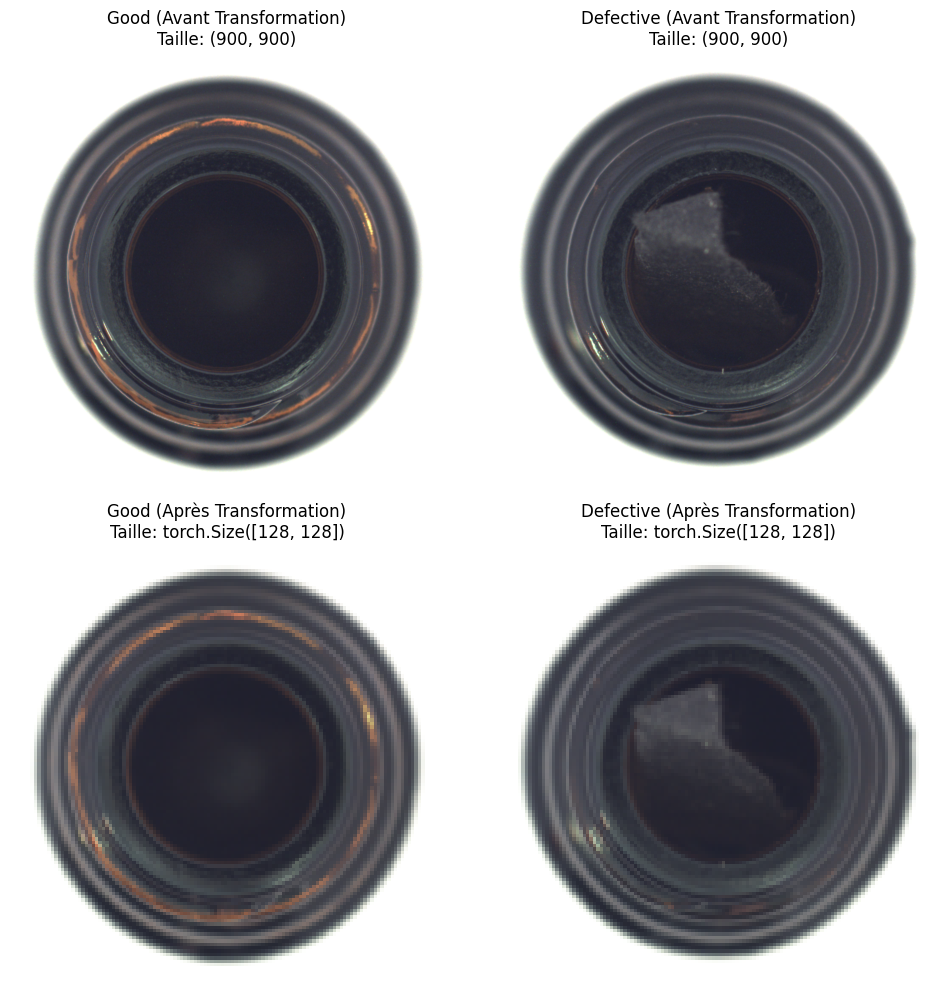

In [42]:
def afficher_image_avec_transformations(dataset, transform, index_good, index_defective):
    """
    Affiche une image "good" et une image "défectueuse" avant et après transformation,
    ainsi que leurs dimensions respectives.

    :param dataset: Dataset brut (DataFrame ou dossier contenant les images)
    :param transform: Transformation à appliquer
    :param index_good: Index de l'image "good" à afficher
    :param index_defective: Index de l'image "défectueuse" à afficher
    """
    # Sélection d'une image good et une défectueuse depuis le DataFrame
    path_good = dataset.iloc[index_good]['filename']
    path_defective = dataset.iloc[index_defective]['filename']

    # Chargement brut des images
    image_good_raw = Image.open(path_good).convert('RGB')
    image_defective_raw = Image.open(path_defective).convert('RGB')

    # Dimensions avant transformation
    size_good_raw = image_good_raw.size
    size_defective_raw = image_defective_raw.size

    # Application des transformations
    image_good_transformed = transform(image_good_raw)
    image_defective_transformed = transform(image_defective_raw)

    # Dimensions après transformation
    size_good_transformed = image_good_transformed.shape[-2:]  # (Height, Width)
    size_defective_transformed = image_defective_transformed.shape[-2:]  # (Height, Width)

    # Conversion des tenseurs en format compatible avec Matplotlib
    image_good_transformed_np = image_good_transformed.permute(1, 2, 0).numpy()
    image_defective_transformed_np = image_defective_transformed.permute(1, 2, 0).numpy()

    # Création des sous-plots pour afficher les images
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Avant transformation
    axes[0, 0].imshow(image_good_raw)
    axes[0, 0].set_title(f"Good (Avant Transformation)\nTaille: {size_good_raw}")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(image_defective_raw)
    axes[0, 1].set_title(f"Defective (Avant Transformation)\nTaille: {size_defective_raw}")
    axes[0, 1].axis("off")

    # Après transformation
    axes[1, 0].imshow(image_good_transformed_np)
    axes[1, 0].set_title(f"Good (Après Transformation)\nTaille: {size_good_transformed}")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(image_defective_transformed_np)
    axes[1, 1].set_title(f"Defective (Après Transformation)\nTaille: {size_defective_transformed}")
    axes[1, 1].axis("off")

    # Ajustement de l'espacement
    plt.tight_layout()
    plt.show()


# Afficher une image "good" et une "défectueuse" pour Bottle
index_good = 0  # Index de la première image "good" dans total_train_df_bottle
index_defective = next(i for i, x in enumerate(test_df_bottle['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_bottle, transform, index_good, index_defective)


In [14]:
# Training images
total_train_df_hazelnut = pd.DataFrame({
    'filename': train_filenames_hazelnut,
    'category': train_categories_H
})

# Test images
test_df_hazelnut = pd.DataFrame({
    'filename': test_filenames_H,
    'category': test_categories_H
})


# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_hazelnut['filename'] = total_train_df_hazelnut['filename'].apply(lambda x: os.path.join(pathh+'/train/good', x))
test_df_hazelnut['filename'] = test_df_hazelnut['filename'].apply(lambda x: os.path.join(target_dirH, x))

In [15]:
print(f"Number of training samples: {len(total_train_df_hazelnut)}")
print(f"Number of test samples: {len(test_df_hazelnut)}")

Number of training samples: 391
Number of test samples: 110


In [36]:
train_dataset_hazelnut = CustomDataset(total_train_df_hazelnut, transform=transform)
test_dataset_hazelnut = CustomDataset(test_df_hazelnut, transform=transform)

train_loader_hazelnut = DataLoader(train_dataset_hazelnut, batch_size=32, shuffle=True)
test_loader_hazelnut = DataLoader(test_dataset_hazelnut, batch_size=32, shuffle=False)

for images, labels in train_loader_hazelnut:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


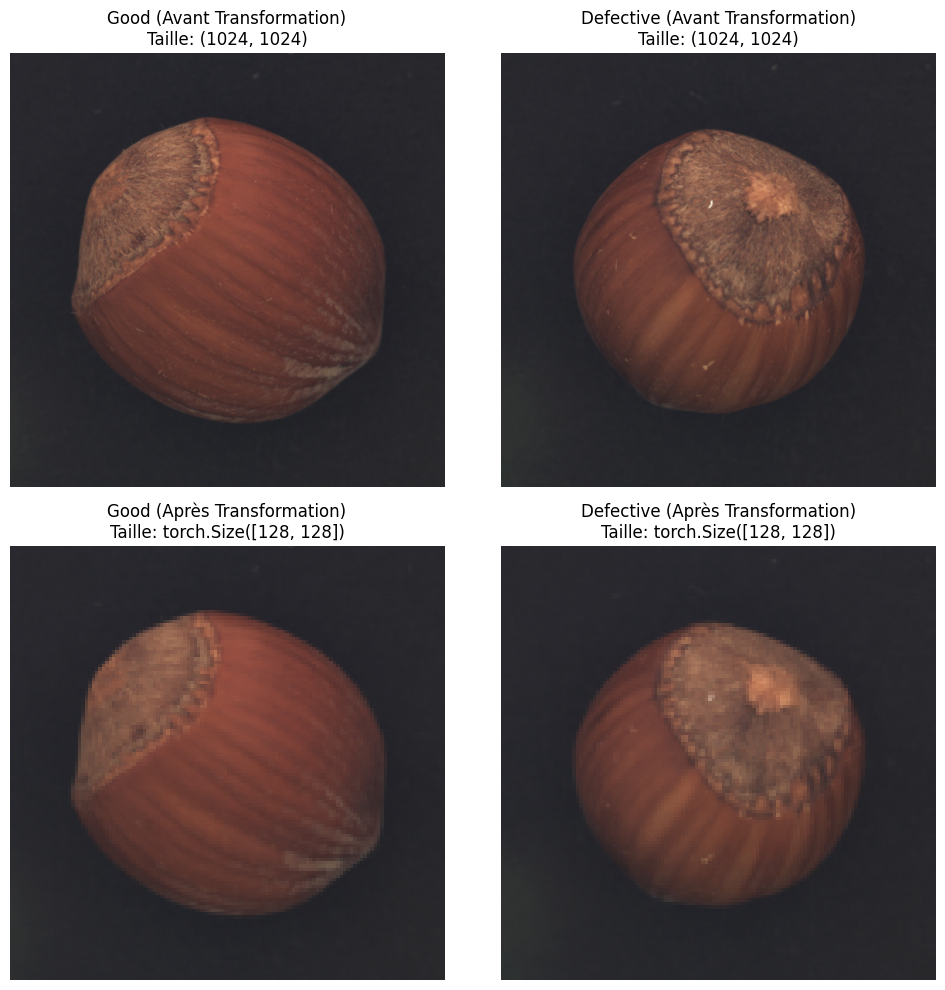

In [43]:
# Afficher une image "good" et une "défectueuse" pour Hazelnut
index_good = 0  # Index de la première image "good"
index_defective = next(i for i, x in enumerate(test_df_bottle['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_hazelnut, transform, index_good, index_defective)

In [37]:
# Training images
total_train_df_capsule = pd.DataFrame({
    'filename': train_filenames_capsule,
    'category': train_categories_C
})

# Test images
test_df_capsule = pd.DataFrame({
    'filename': test_filenames_C,
    'category': test_categories_C
})

# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_capsule['filename'] = total_train_df_capsule['filename'].apply(lambda x: os.path.join(pathc+'/train/good', x))
test_df_capsule['filename'] = test_df_capsule['filename'].apply(lambda x: os.path.join(target_dirC, x))

In [38]:
print(f"Number of training samples: {len(total_train_df_capsule)}")
print(f"Number of test samples: {len(test_df_capsule)}")

Number of training samples: 219
Number of test samples: 132


In [39]:
train_dataset_capsule = CustomDataset(total_train_df_capsule, transform=transform)
test_dataset_capsule = CustomDataset(test_df_capsule, transform=transform)

train_loader_capsule = DataLoader(train_dataset_capsule, batch_size=32, shuffle=True)
test_loader_capsule = DataLoader(test_dataset_capsule, batch_size=32, shuffle=False)

for images, labels in train_loader_capsule:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


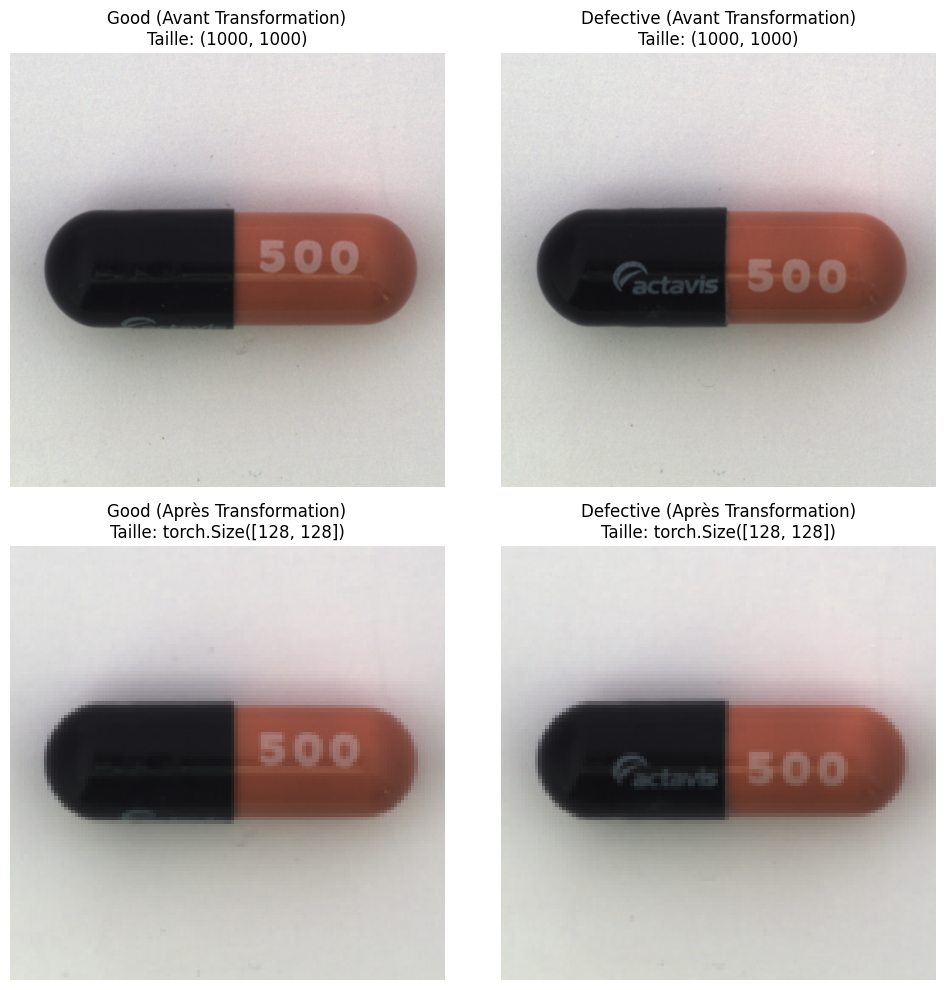

In [44]:
# Afficher une image "good" et une "défectueuse" pour Capsule
index_good = 0  # Index de la première image "good" 
index_defective = next(i for i, x in enumerate(test_df_bottle['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_capsule, transform, index_good, index_defective)

In [24]:
# Training images
total_train_df_toothbrush = pd.DataFrame({
    'filename': train_filenames_toothbrush,
    'category': train_categories_T
})

# Test images
test_df_toothbrush = pd.DataFrame({
    'filename': test_filenames_T,
    'category': test_categories_T
})


# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_toothbrush['filename'] = total_train_df_toothbrush['filename'].apply(lambda x: os.path.join(patht+'/train/good', x))
test_df_toothbrush['filename'] = test_df_toothbrush['filename'].apply(lambda x: os.path.join(target_dirT, x))

In [25]:
print(f"Number of training samples: {len(total_train_df_toothbrush)}")
print(f"Number of test samples: {len(test_df_toothbrush)}")

Number of training samples: 60
Number of test samples: 42


In [40]:
train_dataset_toothbrush = CustomDataset(total_train_df_toothbrush, transform=transform)
test_dataset_toothbrush = CustomDataset(test_df_toothbrush, transform=transform)

train_loader_hazelnut = DataLoader(train_dataset_toothbrush, batch_size=32, shuffle=True)
test_loader_hazelnut = DataLoader(test_dataset_toothbrush, batch_size=32, shuffle=False)

for images, labels in train_loader_hazelnut:
    print(f"Batch size: {images.size()}, Labels: {labels}")
    break

Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


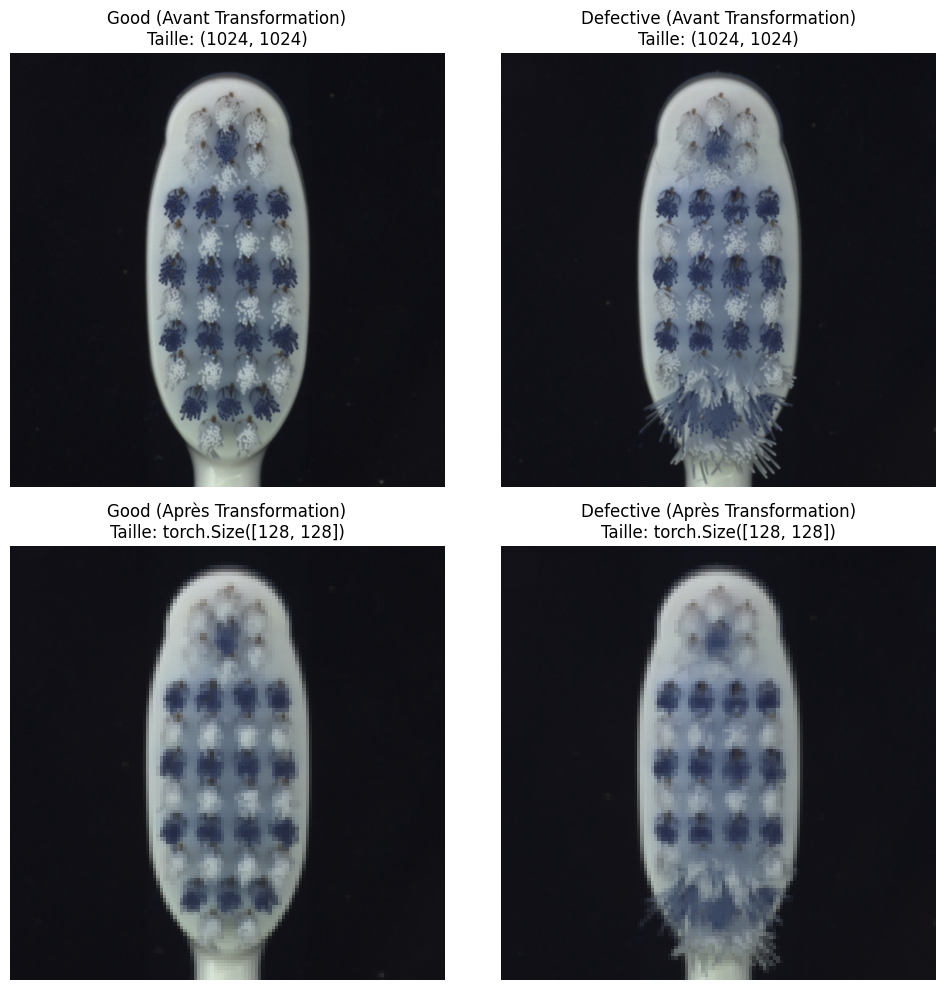

In [45]:
# Afficher une image "good" et une "défectueuse" pour Toothbrush
index_good = 0  # Index de la première image "good" 
index_defective = next(i for i, x in enumerate(test_df_bottle['category']) if x == 1)  # Trouver un "défectueux"

afficher_image_avec_transformations(test_df_toothbrush, transform, index_good, index_defective)

# Training images
total_train_df_W = pd.DataFrame({
    'filename': train_filenames_W,
    'category': train_categories_W
})

# Test images
test_df_W = pd.DataFrame({
    'filename': test_filenames_W,
    'category': test_categories_W
})


# Mise à jour des chemins dans le DataFrame pour inclure les extensions correctes
total_train_df_W['filename'] = total_train_df_W['filename'].apply(lambda x: os.path.join(pathw+'/train/good', x))
test_df_W['filename'] = test_df_W['filename'].apply(lambda x: os.path.join(target_dirW, x))
print(total_train_df_W)

# I - Partie 1 : Train SSL

In [13]:
class Encoder(nn.Module):
    def __init__(self, in_channels=3, latent_dim=128):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=2, padding=1),  # 32x32 -> 16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 16x16 -> 8x8
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 8x8 -> 4x4
            nn.ReLU(),
            nn.Conv2d(256, latent_dim, kernel_size=4, stride=2, padding=1),  # 4x4 -> 2x2
            nn.ReLU(),
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=128, out_channels=3):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 256, kernel_size=4, stride=2, padding=1),  # 2x2 -> 4x4
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, out_channels, kernel_size=4, stride=2, padding=1),  # 16x16 -> 32x32
            nn.ReLU(),
        )

    def forward(self, x):
        return self.decoder(x)


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

# Définir un Dataset personnalisé
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame contenant les colonnes ['path', 'label'].
            transform (callable, optional): Transformations à appliquer sur les images.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.dataframe.iloc[idx, 1]

        try:
            image = Image.open(img_path).convert("RGB")
            if self.transform:
                image = self.transform(image)
        except Exception as e:
            print(f"Erreur lors du chargement de l'image {img_path}: {e}")
            return None

        return image, torch.tensor(label, dtype=torch.long)

# Exemple d'utilisation
def create_dataloader(dataframe, batch_size=128, image_size=(32, 32), shuffle=True):
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
    ])
    dataset = CustomDataset(dataframe, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=2)
    return dataloader

# Exemple de DataFrame

# Création des DataLoaders pour "bottle"
dataloader_train_b = create_dataloader(total_train_df_bottle, batch_size=1)
dataloader_test_b = create_dataloader(test_df_bottle, batch_size=1)

# Création des DataLoaders pour "hazelnut"
dataloader_train_h = create_dataloader(total_train_df_hazelnut, batch_size=1)
dataloader_test_h = create_dataloader(test_df_hazelnut, batch_size=1)

# Création des DataLoaders pour "capsule"
dataloader_train_c = create_dataloader(total_train_df_capsule, batch_size=1)
dataloader_test_c = create_dataloader(test_df_capsule, batch_size=1)

# Création des DataLoaders pour "toothbrush"
dataloader_train_t = create_dataloader(total_train_df_toothbrush, batch_size=1)
dataloader_test_t = create_dataloader(test_df_toothbrush, batch_size=1)

# Création des DataLoaders pour EW (w)
#dataloader_train_w = create_dataloader(total_train_df_W, batch_size=1)
#dataloader_test_w = create_dataloader(test_df_W, batch_size=1)


In [15]:
def train_ssl_model(model, 
                    train_loader, 
                    test_loader, 
                    criterion,
                    optimizer,
                    device=device,
                    epochs=5):

    for epoch in range(epochs):
        model.to(device)
        model.train()
        total_train_loss = 0
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()
            output, _ = model(images)
            loss = criterion(output, images)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for images, _ in test_loader:
                images = images.to(device)
                output, _ = model(images)
                val_loss = criterion(output, images)
                total_val_loss += val_loss.item()

        avg_val_loss = total_val_loss / len(test_loader)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Avg Val Loss: {avg_val_loss:.4f}")
    
    return model.encoder

## Pretext tasks 1 : colorizing model

Explications.

In [16]:
class ColorizationModel(nn.Module):
    def __init__(self, latent_dim=128):
        super(ColorizationModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim, in_channels=1)
        self.decoder = Decoder(latent_dim=latent_dim, out_channels=3)

    def forward(self, x):
        grayscale_x = transforms.Grayscale()(x)  # Convert RGB to Grayscale
        z = self.encoder(grayscale_x)
        Z=self.decoder(z)
        return Z, grayscale_x

### Sur MVTec_AD

In [17]:
print("Training bottle")
# Modèle de colorisation
colorization_model_bottle = ColorizationModel(latent_dim=128)  # Instantiate the colorization model
print
# Pré-entrainement pour "bottle"
colorization_model_bottle = train_ssl_model(
    colorization_model_bottle,
    dataloader_train_b,
    dataloader_test_b,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_bottle.parameters(), lr=0.001)
)

Training bottle
Epoch 1/5, Train Loss: 0.0274, Avg Val Loss: 0.0018
Epoch 2/5, Train Loss: 0.0007, Avg Val Loss: 0.0018
Epoch 3/5, Train Loss: 0.0008, Avg Val Loss: 0.0017
Epoch 4/5, Train Loss: 0.0009, Avg Val Loss: 0.0017
Epoch 5/5, Train Loss: 0.0012, Avg Val Loss: 0.0016


In [18]:
print("Training hazelnut")
colorization_model_hazelnut = ColorizationModel(latent_dim=128)  # Instantiate the colorization model

# Pré-entrainement pour "hazelnut"
colorization_encoder_h = train_ssl_model(
    colorization_model_hazelnut,
    dataloader_train_h,
    dataloader_test_h,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_hazelnut.parameters(), lr=0.001)
)

print("Training capsule")
colorization_model_capsule = ColorizationModel(latent_dim=128)  # Instantiate the colorization model

# Pré-entrainement pour "capsule"
colorization_encoder_c = train_ssl_model(
    colorization_model_capsule,
    dataloader_train_c,
    dataloader_test_c,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_capsule.parameters(), lr=0.001)
)

print("Training toothbrush")
colorization_model_toothbrush = ColorizationModel(latent_dim=128)  # Instantiate the colorization model

# Pré-entrainement pour "toothbrush"
colorization_encoder_t = train_ssl_model(
    colorization_model_toothbrush,
    dataloader_train_t,
    dataloader_test_t,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_toothbrush.parameters(), lr=0.001))

Training hazelnut
Epoch 1/5, Train Loss: 0.0038, Avg Val Loss: 0.0019
Epoch 2/5, Train Loss: 0.0012, Avg Val Loss: 0.0015
Epoch 3/5, Train Loss: 0.0010, Avg Val Loss: 0.0013
Epoch 4/5, Train Loss: 0.0009, Avg Val Loss: 0.0013
Epoch 5/5, Train Loss: 0.0008, Avg Val Loss: 0.0012
Training capsule
Epoch 1/5, Train Loss: 0.0818, Avg Val Loss: 0.0015
Epoch 2/5, Train Loss: 0.0010, Avg Val Loss: 0.0006
Epoch 3/5, Train Loss: 0.0009, Avg Val Loss: 0.0011
Epoch 4/5, Train Loss: 0.0008, Avg Val Loss: 0.0005
Epoch 5/5, Train Loss: 0.0009, Avg Val Loss: 0.0006
Training toothbrush
Epoch 1/5, Train Loss: 0.0236, Avg Val Loss: 0.0039
Epoch 2/5, Train Loss: 0.0023, Avg Val Loss: 0.0018
Epoch 3/5, Train Loss: 0.0019, Avg Val Loss: 0.0021
Epoch 4/5, Train Loss: 0.0018, Avg Val Loss: 0.0030
Epoch 5/5, Train Loss: 0.0017, Avg Val Loss: 0.0018


Interprétations.

### Sur Auto_VI

colorization_model_w = ColorizationModel(latent_dim=128)  # Instantiate the colorization model

# Pré-entrainement pour "engine wiring" (w)
colorization_encoder_w = train_ssl_model(
    colorization_model_w,
    dataloader_train_w,
    dataloader_test_w,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(colorization_model_w.parameters(), lr=0.001)
)

Interprétations.

## Pretext tasks 2 : inpainting model

In [19]:
class InpaintingModel(nn.Module):
    def __init__(self, latent_dim=128, mask_size=8):
        super(InpaintingModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)
        self.mask_size = mask_size

    def forward(self, x):
        x_masked = self.apply_mask(x)
        z = self.encoder(x_masked)
        return self.decoder(z), x_masked

    def apply_mask(self, x):
        masked_x = x.clone()

        for i in range(masked_x.size(0)):
            ul_x = np.random.randint(0, x.size(2) - self.mask_size + 1)
            ul_y = np.random.randint(0, x.size(3) - self.mask_size + 1)
            masked_x[i, :, ul_x:ul_x+self.mask_size, ul_y:ul_y+self.mask_size] = 0

        return masked_x

### Sur MVTec_AD

In [20]:
inpainting_model_bottle = InpaintingModel(mask_size=8)
inpainting_encoder_bottle = train_ssl_model(inpainting_model_bottle,
                                     dataloader_train_b,
                                     dataloader_test_b,
                                     criterion=nn.MSELoss(),
                                     optimizer=optim.Adam(inpainting_model_bottle.parameters(), lr=0.001)
                                     )

Epoch 1/5, Train Loss: 0.0183, Avg Val Loss: 0.0019
Epoch 2/5, Train Loss: 0.0012, Avg Val Loss: 0.0016
Epoch 3/5, Train Loss: 0.0012, Avg Val Loss: 0.0018
Epoch 4/5, Train Loss: 0.0009, Avg Val Loss: 0.0017
Epoch 5/5, Train Loss: 0.0009, Avg Val Loss: 0.0020


In [21]:
print("Training hazelnut")
inpainting_model_hazelnut = InpaintingModel(mask_size=8) 

# Pré-entrainement pour "hazelnut"
inpainting_encoder_h = train_ssl_model(
    inpainting_model_hazelnut,
    dataloader_train_h,
    dataloader_test_h,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_hazelnut.parameters(), lr=0.001)
)

print("Training capsule")
inpainting_model_capsule = InpaintingModel(mask_size=8) 

# Pré-entrainement pour "capsule"
inpainting_encoder_c = train_ssl_model(
    inpainting_model_capsule,
    dataloader_train_c,
    dataloader_test_c,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_capsule.parameters(), lr=0.001)
)

print("Training toothbrush")
inpainting_model_toothbrush = InpaintingModel(mask_size=8) 
# Pré-entrainement pour "toothbrush"
inpainting_encoder_t = train_ssl_model(
    inpainting_model_toothbrush,
    dataloader_train_t,
    dataloader_test_t,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(inpainting_model_toothbrush.parameters(), lr=0.001))

Training hazelnut
Epoch 1/5, Train Loss: 0.0039, Avg Val Loss: 0.0018
Epoch 2/5, Train Loss: 0.0013, Avg Val Loss: 0.0018
Epoch 3/5, Train Loss: 0.0012, Avg Val Loss: 0.0017
Epoch 4/5, Train Loss: 0.0010, Avg Val Loss: 0.0014
Epoch 5/5, Train Loss: 0.0010, Avg Val Loss: 0.0014
Training capsule
Epoch 1/5, Train Loss: 0.0805, Avg Val Loss: 0.0014
Epoch 2/5, Train Loss: 0.0007, Avg Val Loss: 0.0006
Epoch 3/5, Train Loss: 0.0009, Avg Val Loss: 0.0006
Epoch 4/5, Train Loss: 0.0005, Avg Val Loss: 0.0005
Epoch 5/5, Train Loss: 0.0005, Avg Val Loss: 0.0011
Training toothbrush
Epoch 1/5, Train Loss: 0.0252, Avg Val Loss: 0.0046
Epoch 2/5, Train Loss: 0.0027, Avg Val Loss: 0.0023
Epoch 3/5, Train Loss: 0.0017, Avg Val Loss: 0.0021
Epoch 4/5, Train Loss: 0.0018, Avg Val Loss: 0.0018
Epoch 5/5, Train Loss: 0.0017, Avg Val Loss: 0.0017


Interpretations.

In [22]:
def visualize_reconstructions(model, data_loader, device, num_images=5):
    # Set the model to evaluation mode
    model.eval()

    # Convert the DataLoader to a list to randomly sample images
    dataset = list(data_loader.dataset)

    # Randomly select `num_images` images from the dataset
    random_indices = random.sample(range(len(dataset)), num_images)
    random_images = [dataset[i][0] for i in random_indices]  # Extract only the images, ignoring labels

    # Stack the images into a batch
    images = torch.stack(random_images)

    # Move images to the specified device
    images = images.to(device)
    print(f"image.shape = {random_images[0].shape}")
    print(f"images = {images.shape}")
    # Run the grayscale images through the colorization model
    with torch.no_grad():
        reconstructed_images, perturbed_images = model(images)

    # Move images back to CPU for visualization
    images = images.cpu()
    reconstructed_images = reconstructed_images.cpu()
    perturbed_images = perturbed_images.cpu()
    print(f"reconstructed_images.shape = {reconstructed_images.shape}")
    print(f"grayscale_images.shape = {perturbed_images.shape}")

    # Plot the grayscale, ground truth, and colorized images
    fig, axes = plt.subplots(num_images, 3, figsize=(10, num_images * 4))
    for i in range(num_images):
        print(f"reconstructed_images[{i}].shape = {reconstructed_images[i].shape}")
        # Grayscale input
        axes[i, 0].imshow(perturbed_images[i].permute(1, 2, 0).squeeze(), cmap='gray')
        axes[i, 0].set_title("Image bruitée")
        axes[i, 0].axis('off')

        # Ground truth (original RGB image)
        axes[i, 1].imshow(images[i].permute(1, 2, 0))
        axes[i, 1].set_title("Image initiale")
        axes[i, 1].axis('off')

        # Colorized output from the model
        axes[i, 2].imshow(reconstructed_images[i].permute(1, 2, 0))
        axes[i, 2].set_title("Image reconstruite")
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

image.shape = torch.Size([3, 32, 32])
images = torch.Size([5, 3, 32, 32])
reconstructed_images.shape = torch.Size([5, 3, 32, 32])
grayscale_images.shape = torch.Size([5, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12313483..1.0795679].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.123351775..1.0738604].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12288119..1.0874109].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.123068795..1.0865107].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1227573..1.0880075].


reconstructed_images[0].shape = torch.Size([3, 32, 32])
reconstructed_images[1].shape = torch.Size([3, 32, 32])
reconstructed_images[2].shape = torch.Size([3, 32, 32])
reconstructed_images[3].shape = torch.Size([3, 32, 32])
reconstructed_images[4].shape = torch.Size([3, 32, 32])


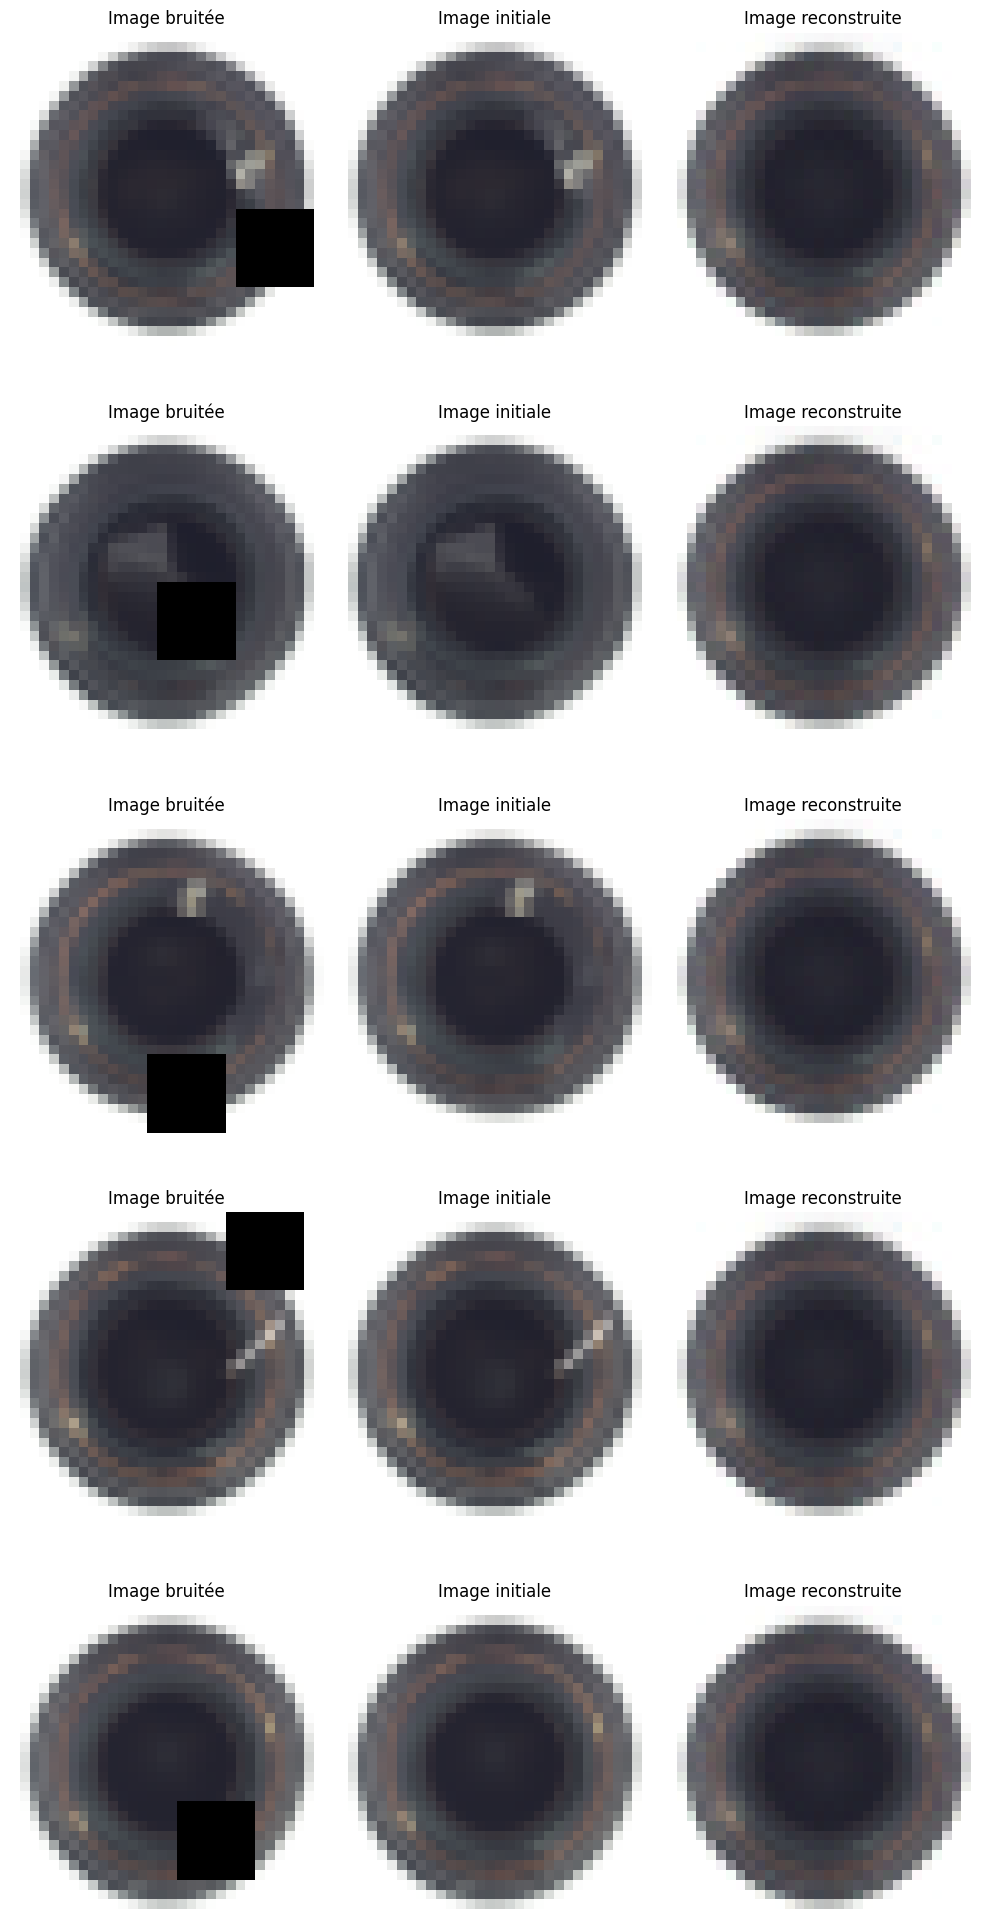

In [23]:
visualize_reconstructions(inpainting_model_bottle, dataloader_test_b, device=device, num_images=5)

### Sur Auto_VI

Abandon stratégique car il ne fonctionne pas au dessus.

## Pretext tasks 3 : masked autoencoder

In [24]:
class MaskedAutoencoderModel(nn.Module):
    def __init__(self, latent_dim=128, mask_ratio=1/16):
        super(MaskedAutoencoderModel, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim)
        self.mask_ratio = mask_ratio

    def forward(self, x):
        x_masked = self.apply_mask(x)
        z = self.encoder(x_masked)
        return self.decoder(z), x_masked

    def apply_mask(self, x):
        x_masked = x.clone()
        mask = torch.rand_like(x[:, 0, :, :]) < self.mask_ratio
        mask = mask.unsqueeze(1).repeat(1, x.size(1), 1, 1)
        x_masked[mask] = 0
        return x_masked

### Sur MVTec_AD

In [25]:
mae_model_bottle = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)
mae_encoder_bottle = train_ssl_model(mae_model_bottle,
                              dataloader_train_b,
                              dataloader_test_b,
                              criterion=nn.MSELoss(),
                              optimizer=optim.Adam(mae_model_bottle.parameters(), lr=0.001)
                              )

Epoch 1/5, Train Loss: 0.0578, Avg Val Loss: 0.0361
Epoch 2/5, Train Loss: 0.0352, Avg Val Loss: 0.0358
Epoch 3/5, Train Loss: 0.0348, Avg Val Loss: 0.0358
Epoch 4/5, Train Loss: 0.0349, Avg Val Loss: 0.0357
Epoch 5/5, Train Loss: 0.0347, Avg Val Loss: 0.0357


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0272254].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0200391].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0365252].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0385531].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0452174].


image.shape = torch.Size([3, 32, 32])
images = torch.Size([5, 3, 32, 32])
reconstructed_images.shape = torch.Size([5, 3, 32, 32])
grayscale_images.shape = torch.Size([5, 3, 32, 32])
reconstructed_images[0].shape = torch.Size([3, 32, 32])
reconstructed_images[1].shape = torch.Size([3, 32, 32])
reconstructed_images[2].shape = torch.Size([3, 32, 32])
reconstructed_images[3].shape = torch.Size([3, 32, 32])
reconstructed_images[4].shape = torch.Size([3, 32, 32])


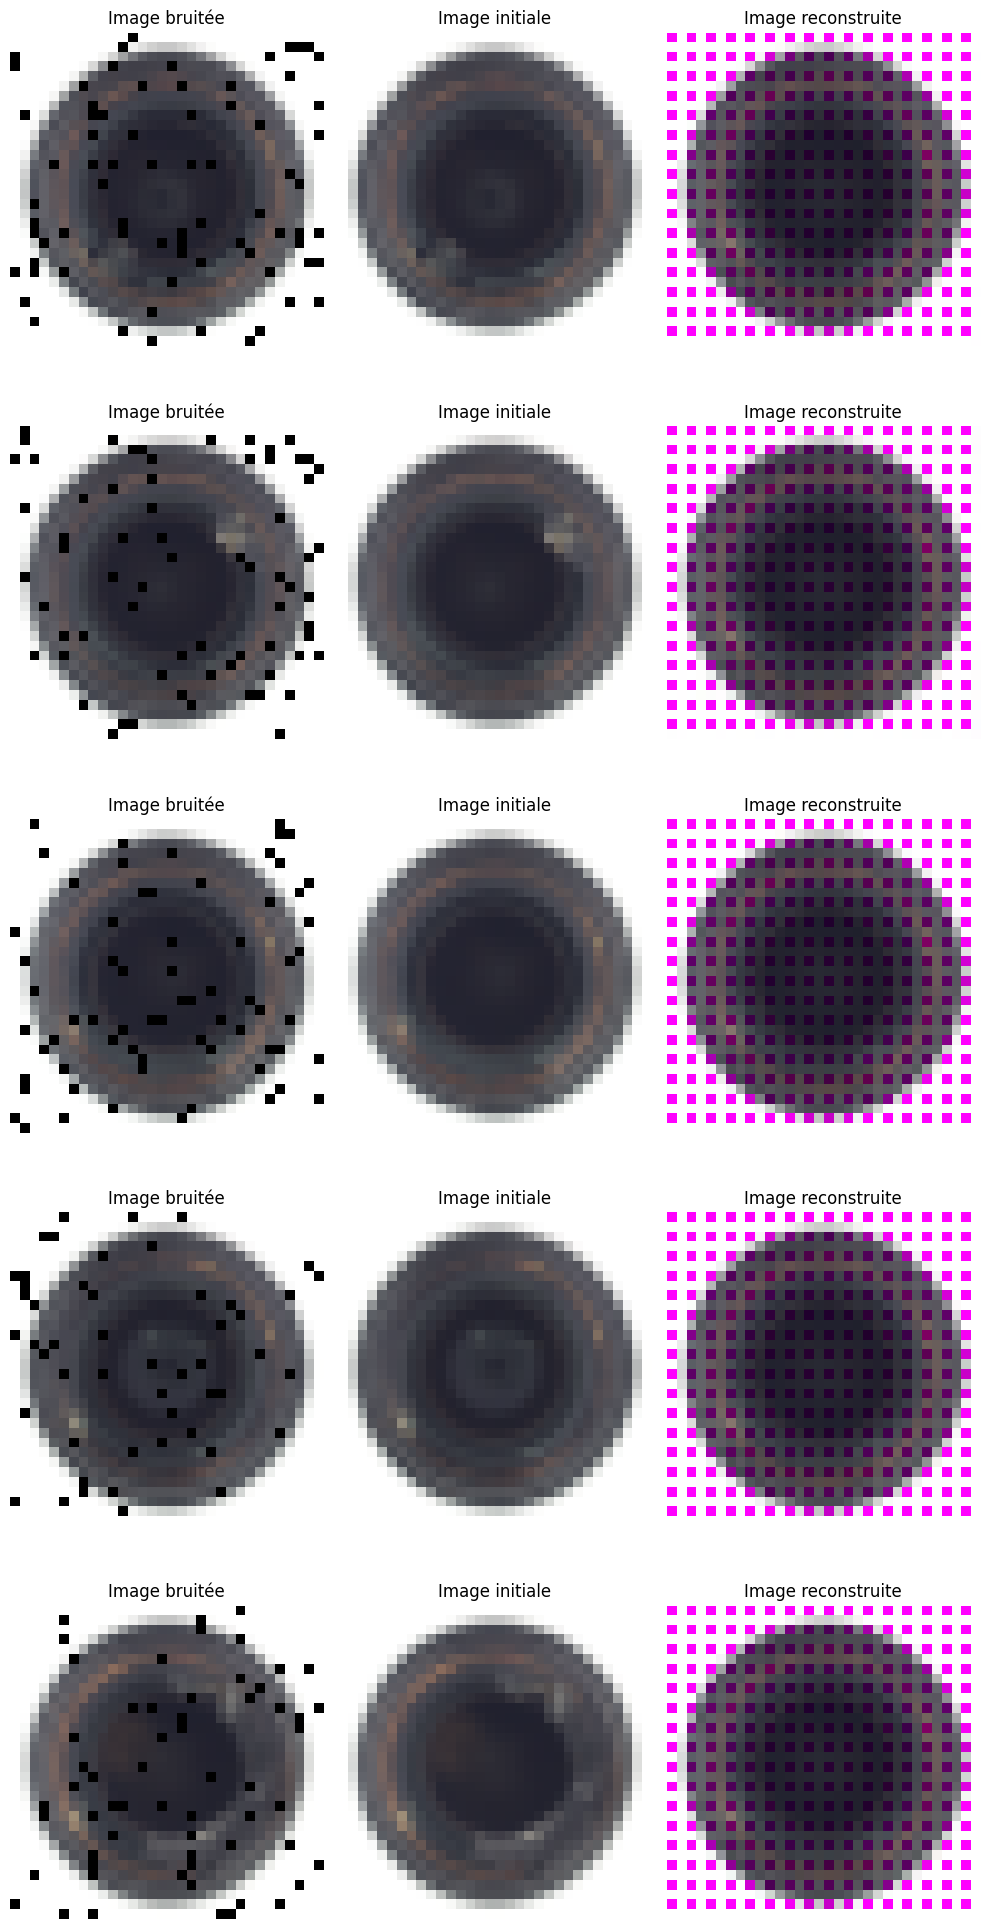

In [26]:
visualize_reconstructions(mae_model_bottle, dataloader_test_b, device=device, num_images=5)

In [27]:
print("Training hazelnut")
mae_model_hazelnut = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)

# Pré-entrainement pour "hazelnut"
mae_encoder_h = train_ssl_model(
    mae_model_hazelnut,
    dataloader_train_h,
    dataloader_test_h,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_hazelnut.parameters(), lr=0.001)
)

print("Training capsule")
mae_model_capsule = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)

# Pré-entrainement pour "capsule"
mae_encoder_c = train_ssl_model(
    mae_model_capsule,
    dataloader_train_c,
    dataloader_test_c,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_capsule.parameters(), lr=0.001)
)

print("Training toothbrush")
mae_model_toothbrush = MaskedAutoencoderModel(latent_dim=128, mask_ratio=1/16)
# Pré-entrainement pour "toothbrush"
mae_encoder_t = train_ssl_model(
    mae_model_toothbrush,
    dataloader_train_t,
    dataloader_test_t,
    criterion=nn.MSELoss(),
    optimizer=optim.Adam(mae_model_toothbrush.parameters(), lr=0.001))

Training hazelnut
Epoch 1/5, Train Loss: 0.0240, Avg Val Loss: 0.0231
Epoch 2/5, Train Loss: 0.0164, Avg Val Loss: 0.0157
Epoch 3/5, Train Loss: 0.0149, Avg Val Loss: 0.0157
Epoch 4/5, Train Loss: 0.0127, Avg Val Loss: 0.0014
Epoch 5/5, Train Loss: 0.0009, Avg Val Loss: 0.0011
Training capsule
Epoch 1/5, Train Loss: 0.5143, Avg Val Loss: 0.5104
Epoch 2/5, Train Loss: 0.5143, Avg Val Loss: 0.5104
Epoch 3/5, Train Loss: 0.5143, Avg Val Loss: 0.5104
Epoch 4/5, Train Loss: 0.5143, Avg Val Loss: 0.5104
Epoch 5/5, Train Loss: 0.5143, Avg Val Loss: 0.5104
Training toothbrush
Epoch 1/5, Train Loss: 0.0228, Avg Val Loss: 0.0041
Epoch 2/5, Train Loss: 0.0027, Avg Val Loss: 0.0023
Epoch 3/5, Train Loss: 0.0018, Avg Val Loss: 0.0018
Epoch 4/5, Train Loss: 0.0018, Avg Val Loss: 0.0018
Epoch 5/5, Train Loss: 0.0018, Avg Val Loss: 0.0017


image.shape = torch.Size([3, 32, 32])
images = torch.Size([3, 3, 32, 32])
reconstructed_images.shape = torch.Size([3, 3, 32, 32])
grayscale_images.shape = torch.Size([3, 3, 32, 32])
reconstructed_images[0].shape = torch.Size([3, 32, 32])
reconstructed_images[1].shape = torch.Size([3, 32, 32])
reconstructed_images[2].shape = torch.Size([3, 32, 32])


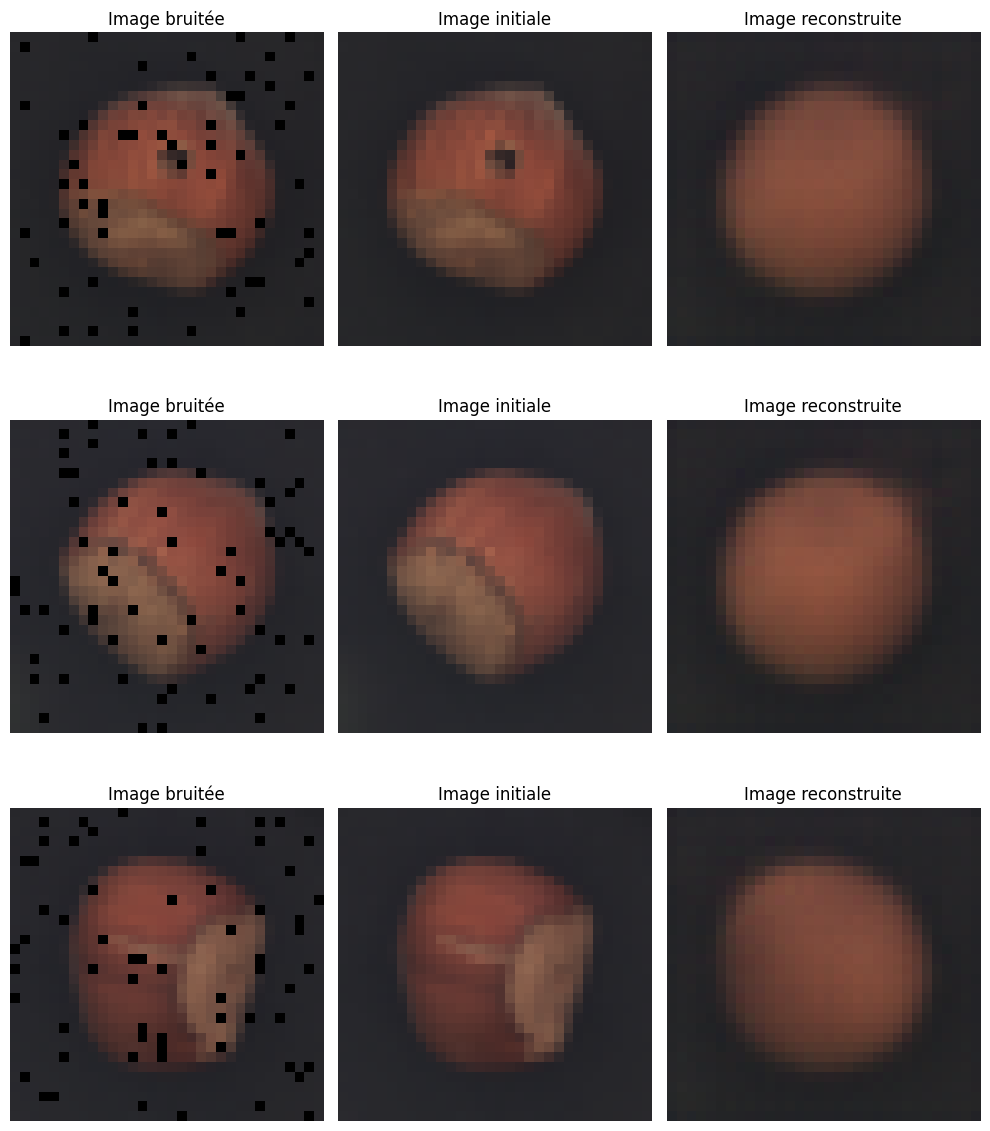

image.shape = torch.Size([3, 32, 32])
images = torch.Size([3, 3, 32, 32])
reconstructed_images.shape = torch.Size([3, 3, 32, 32])
grayscale_images.shape = torch.Size([3, 3, 32, 32])
reconstructed_images[0].shape = torch.Size([3, 32, 32])
reconstructed_images[1].shape = torch.Size([3, 32, 32])
reconstructed_images[2].shape = torch.Size([3, 32, 32])


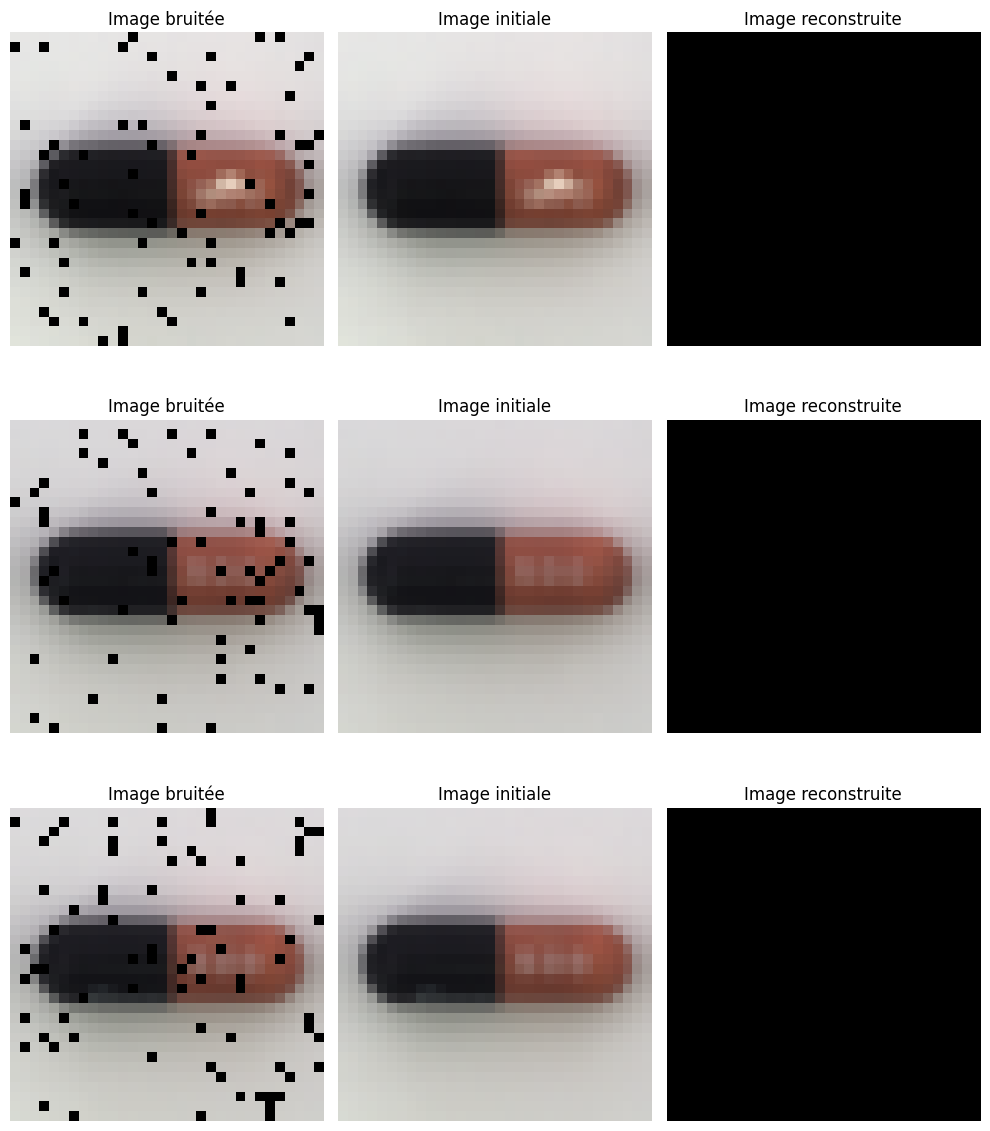

image.shape = torch.Size([3, 32, 32])
images = torch.Size([3, 3, 32, 32])
reconstructed_images.shape = torch.Size([3, 3, 32, 32])
grayscale_images.shape = torch.Size([3, 3, 32, 32])
reconstructed_images[0].shape = torch.Size([3, 32, 32])
reconstructed_images[1].shape = torch.Size([3, 32, 32])
reconstructed_images[2].shape = torch.Size([3, 32, 32])


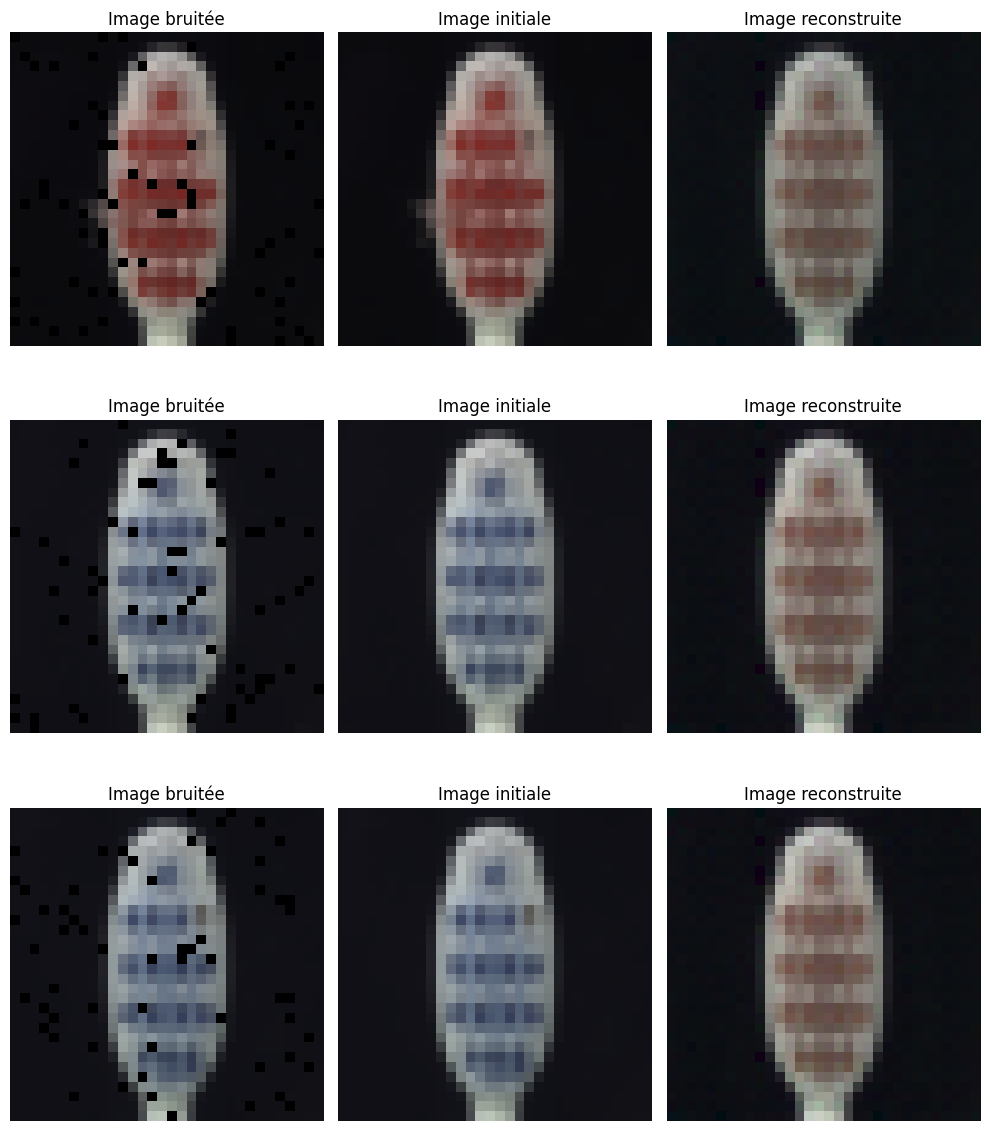

In [28]:
visualize_reconstructions(mae_model_hazelnut, dataloader_test_h, device=device, num_images=3)
visualize_reconstructions(mae_model_capsule, dataloader_test_c, device=device, num_images=3)
visualize_reconstructions(mae_model_toothbrush, dataloader_test_t, device=device, num_images=3)

### Sur Auto_VI

# II - Partie 2 :
Use the model loss as an anomaly score and evaluate the anomaly score’s
discriminative power by plotting the ROC curve and the AUROC metric.

## Pour l'inpainting

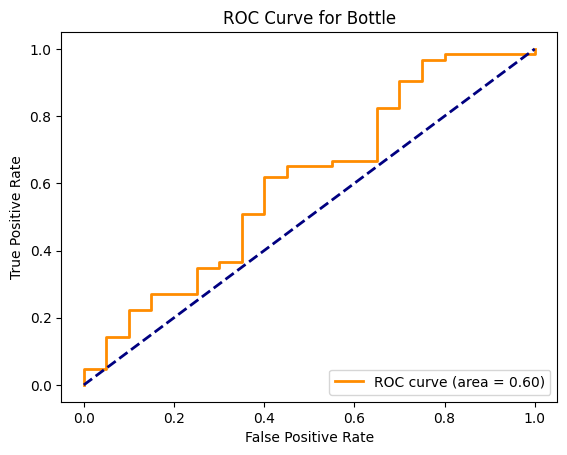

AUROC for Bottle: 0.60


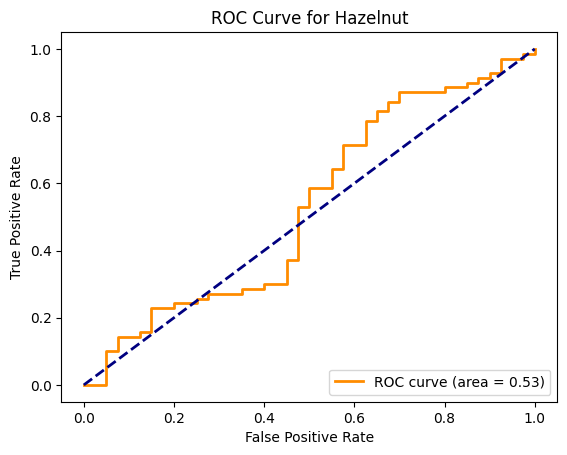

AUROC for Hazelnut: 0.53


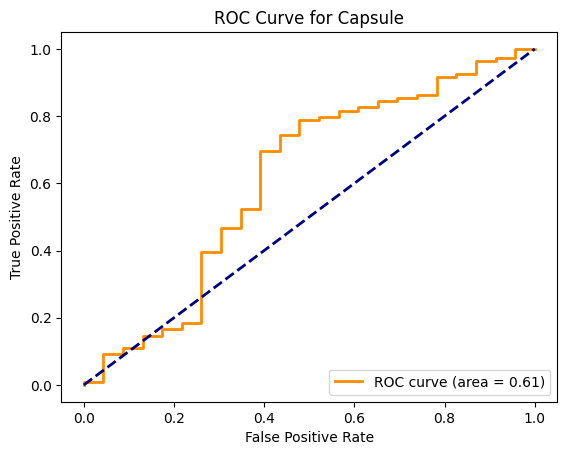

AUROC for Capsule: 0.61


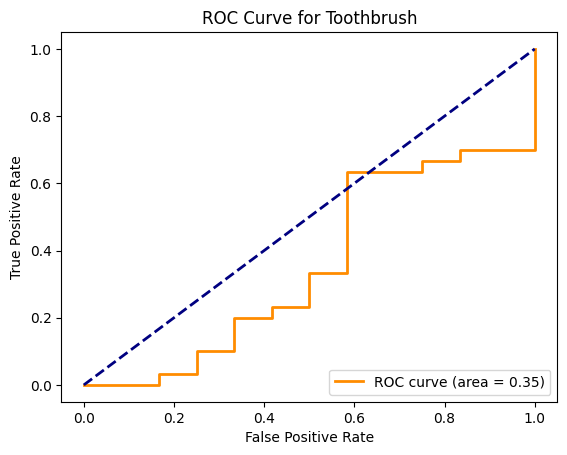

AUROC for Toothbrush: 0.35


In [29]:
import torch
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def calculate_losses(model, dataloader, criterion, device='cpu'):
    model.eval()
    losses = []
    with torch.no_grad():
        for images, _ in dataloader:  # Les labels ne sont pas nécessaires ici
            images = images.to(device)
            outputs, _ = model(images)
            loss = criterion(outputs, images)
            losses.append(loss.item())
    return np.array(losses)

def plot_roc_curve(losses, labels, class_name):
    fpr, tpr, _ = roc_curve(labels, losses)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {class_name}')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc
# Exemple d'utilisation pour "bottle"
criterion = torch.nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calcul des pertes
losses_b = calculate_losses(inpainting_model_bottle, dataloader_test_b, criterion, device)

# Utilisation des labels déjà définis
labels_b = np.array(test_categories_B)

# Tracé de la courbe ROC et calcul de l'AUROC
auroc_b = plot_roc_curve(losses_b, labels_b, "Bottle")
print(f"AUROC for Bottle: {auroc_b:.2f}")

# Répéter pour hazelnut, capsule et toothbrush
losses_h = calculate_losses(inpainting_model_hazelnut, dataloader_test_h, criterion, device)
labels_h = np.array(test_categories_H)  # Labels pour "hazelnut"
auroc_h = plot_roc_curve(losses_h, labels_h, "Hazelnut")
print(f"AUROC for Hazelnut: {auroc_h:.2f}")

losses_c = calculate_losses(inpainting_model_capsule, dataloader_test_c, criterion, device)
labels_c = np.array(test_categories_C)  # Labels pour "capsule"
auroc_c = plot_roc_curve(losses_c, labels_c, "Capsule")
print(f"AUROC for Capsule: {auroc_c:.2f}")

losses_t = calculate_losses(inpainting_model_toothbrush, dataloader_test_t, criterion, device)
labels_t = np.array(test_categories_T)  # Labels pour "toothbrush"
auroc_t = plot_roc_curve(losses_t, labels_t, "Toothbrush")
print(f"AUROC for Toothbrush: {auroc_t:.2f}")

**pas bon** 

## Pour le masked encoder

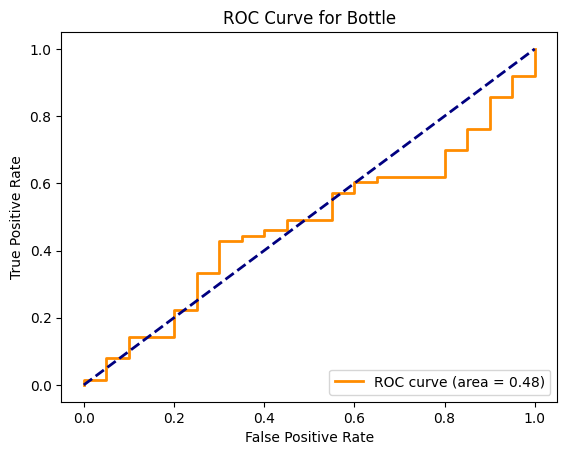

AUROC for Bottle: 0.48


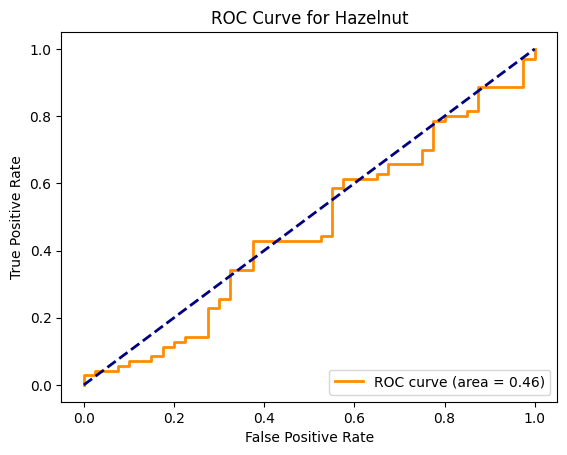

AUROC for Hazelnut: 0.46


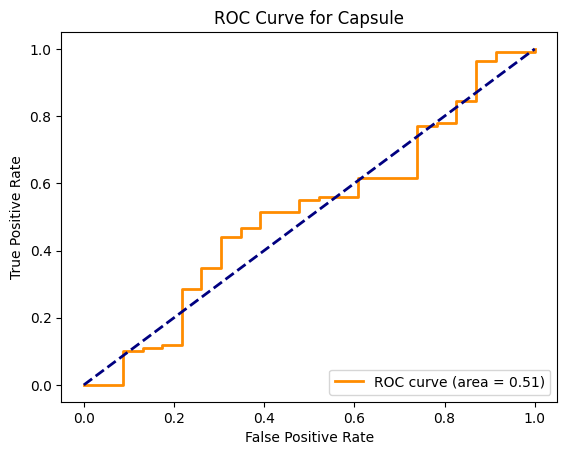

AUROC for Capsule: 0.51


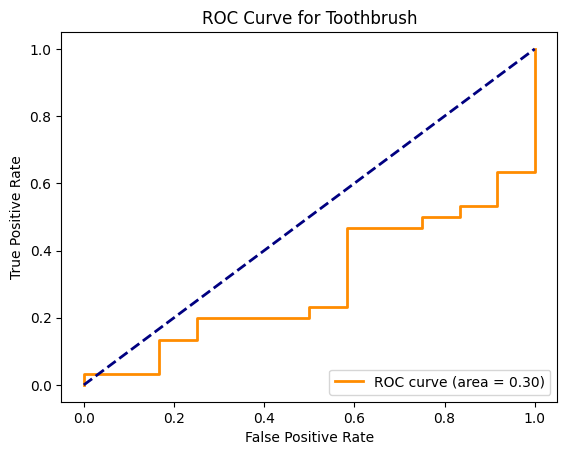

AUROC for Toothbrush: 0.30


In [30]:
# Exemple d'utilisation pour "bottle"
criterion = torch.nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calcul des pertes
losses_b = calculate_losses(mae_model_bottle, dataloader_test_b, criterion, device)

# Utilisation des labels déjà définis
labels_b = np.array(test_categories_B)

# Tracé de la courbe ROC et calcul de l'AUROC
auroc_b = plot_roc_curve(losses_b, labels_b, "Bottle")
print(f"AUROC for Bottle: {auroc_b:.2f}")

# Répéter pour hazelnut, capsule et toothbrush
losses_h = calculate_losses(mae_model_hazelnut, dataloader_test_h, criterion, device)
labels_h = np.array(test_categories_H)  # Labels pour "hazelnut"
auroc_h = plot_roc_curve(losses_h, labels_h, "Hazelnut")
print(f"AUROC for Hazelnut: {auroc_h:.2f}")

losses_c = calculate_losses(mae_model_capsule, dataloader_test_c, criterion, device)
labels_c = np.array(test_categories_C)  # Labels pour "capsule"
auroc_c = plot_roc_curve(losses_c, labels_c, "Capsule")
print(f"AUROC for Capsule: {auroc_c:.2f}")

losses_t = calculate_losses(mae_model_toothbrush, dataloader_test_t, criterion, device)
labels_t = np.array(test_categories_T)  # Labels pour "toothbrush"
auroc_t = plot_roc_curve(losses_t, labels_t, "Toothbrush")
print(f"AUROC for Toothbrush: {auroc_t:.2f}")

**pas bon non plus**

## Pour le colorizing

In [31]:
# Exemple d'utilisation pour "bottle"
criterion = torch.nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Calcul des pertes
losses_b = calculate_losses(colorization_model_bottle, dataloader_test_b, criterion, device)

# Utilisation des labels déjà définis
labels_b = np.array(test_categories_B)

# Tracé de la courbe ROC et calcul de l'AUROC
auroc_b = plot_roc_curve(losses_b, labels_b, "Bottle")
print(f"AUROC for Bottle: {auroc_b:.2f}")

# Répéter pour hazelnut, capsule et toothbrush
losses_h = calculate_losses(colorization_model_hazelnut, dataloader_test_h, criterion, device)
labels_h = np.array(test_categories_H)  # Labels pour "hazelnut"
auroc_h = plot_roc_curve(losses_h, labels_h, "Hazelnut")
print(f"AUROC for Hazelnut: {auroc_h:.2f}")

losses_c = calculate_losses(colorization_model_capsule, dataloader_test_c, criterion, device)
labels_c = np.array(test_categories_C)  # Labels pour "capsule"
auroc_c = plot_roc_curve(losses_c, labels_c, "Capsule")
print(f"AUROC for Capsule: {auroc_c:.2f}")

losses_t = calculate_losses(colorization_model_toothbrush, dataloader_test_t, criterion, device)
labels_t = np.array(test_categories_T)  # Labels pour "toothbrush"
auroc_t = plot_roc_curve(losses_t, labels_t, "Toothbrush")
print(f"AUROC for Toothbrush: {auroc_t:.2f}")

RuntimeError: Given groups=1, weight of size [64, 1, 4, 4], expected input[1, 3, 32, 32] to have 1 channels, but got 3 channels instead